## Подготовка

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as stests
import scipy.stats as st

In [3]:
df = pd.read_csv('test_1.csv', sep=',', low_memory=False)
df

,group,client_id,target
0,test,1,48.294046
1,test,2,50.561098
2,test,3,50.987911
3,test,4,47.819840
4,test,5,50.153417
...,...,...,...
1993,control,1994,50.207788
1994,control,1995,51.715447
1995,control,1996,56.551077
1996,control,1997,47.178478


## Проверка на нормальность с помощью QQ-plot

In [115]:
x = df[df.group == 'test'].target.values
y = df[df.group == 'control'].target.values

In [117]:
mu_x = df[df.group == 'test'].target.mean()
mu_y = df[df.group == 'control'].target.mean()
print(mu_x)
print(mu_y)

49.95894395407758
51.067378748698374


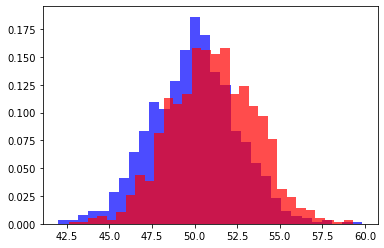

In [68]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=30, density=True, color='red', alpha=0.7)
plt.show()

((array([-3.20045713, -2.93546521, -2.78760269, ...,  2.78760269,
          2.93546521,  3.20045713]),
  array([41.9872647 , 42.37260039, 42.76632564, ..., 57.96396432,
         59.2103887 , 59.85654634])),
 (2.522890258267152, 49.95894395407758, 0.9988696017296792))

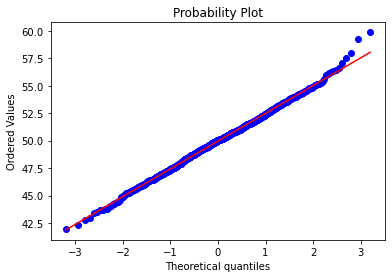

In [118]:
st.probplot(x, dist="norm", plot=plt)

((array([-3.19410727e+00, -2.92862832e+00, -2.78046228e+00, -2.67595340e+00,
         -2.59441353e+00, -2.52716372e+00, -2.46970815e+00, -2.41940604e+00,
         -2.37456967e+00, -2.33405267e+00, -2.29703965e+00, -2.26292923e+00,
         -2.23126477e+00, -2.20169104e+00, -2.17392612e+00, -2.14774237e+00,
         -2.12295322e+00, -2.09940385e+00, -2.07696424e+00, -2.05552417e+00,
         -2.03498932e+00, -2.01527836e+00, -1.99632062e+00, -1.97805432e+00,
         -1.96042511e+00, -1.94338493e+00, -1.92689103e+00, -1.91090528e+00,
         -1.89539343e+00, -1.88032467e+00, -1.86567116e+00, -1.85140764e+00,
         -1.83751113e+00, -1.82396067e+00, -1.81073706e+00, -1.79782272e+00,
         -1.78520143e+00, -1.77285827e+00, -1.76077946e+00, -1.74895220e+00,
         -1.73736465e+00, -1.72600580e+00, -1.71486537e+00, -1.70393379e+00,
         -1.69320212e+00, -1.68266198e+00, -1.67230553e+00, -1.66212540e+00,
         -1.65211467e+00, -1.64226681e+00, -1.63257570e+00, -1.62303553e+00,

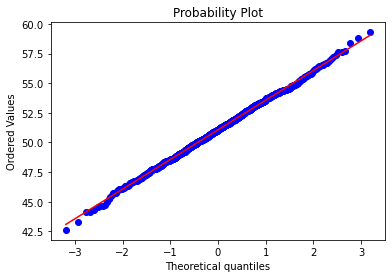

In [119]:
st.probplot(y, dist="norm", plot=plt)

Судя по графикам и QQ-plot'ам, можно сделать вывод, что выборки распределены нормально

## Проверка гипотезы о равенстве средних

In [161]:
res = st.ttest_ind(x, y, alternative='two-sided', equal_var=False)
print("T-statistic:", res[0])
print("P-value:", res[1])

T-statistic: -9.879422047254666
P-value: 1.6631546220432403e-22


P-value меньше alpha, поэтому нулевая гипотеза отклоняется, средние значения отличаются, у тестовой группы оно выше